## Business Insights

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import requests


In [ ]:
# 1️⃣ Top Customer
r = requests.get("http://127.0.0.1:5000/topcustomer")
print(r.status_code)
print(r.text)


200
[{"Customer.Name":"Ahmed Ahmed","TotalPrice":19431768.0},{"Customer.Name":"Hany Gaber","TotalPrice":17519394.0},{"Customer.Name":"Nesma Sayed","TotalPrice":17343694.0},{"Customer.Name":"Mohamed Khalil","TotalPrice":16324610.0},{"Customer.Name":"Hana Mustafa","TotalPrice":16129768.0},{"Customer.Name":"Heba Shafik","TotalPrice":16085592.0},{"Customer.Name":"Reem Hassan","TotalPrice":16025138.0},{"Customer.Name":"Ahmed Fahmy","TotalPrice":15844018.0},{"Customer.Name":"Rania Amin","TotalPrice":15762142.0},{"Customer.Name":"Aisha Ali","TotalPrice":15361250.0}]



In [3]:
data = r.json() 
df = pd.DataFrame(data)

In [4]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=df['Customer.Name'],
    y=df["TotalPrice"],
    name="TopCustomer",
    mode="lines+markers",
    line=dict(color="red",width=3)
))
fig.update_layout(
    title="Top Customer",
    xaxis_title="CustomerNmae",
    yaxis_title="Revenue",
    hovermode="x unified",
    template="plotly_white",
    legend=dict(title="Cities",orientation="h",x=0.3,y=-0.2)

)

### 1️⃣ Top Customer
The analysis of customer purchasing behavior shows that a small segment of customers contributes significantly to total revenue.  
The **top customer** generated the highest sales volume, indicating strong loyalty and repeat purchasing patterns.  
*Insights:* Consider building loyalty programs or personalized promotions for top customers.

In [ ]:
# 2️⃣ Branch Revenue — Last Quarter
q = requests.get("http://127.0.0.1:5000//quartersales")
print(q.status_code)
print(q.text)


200
[{"Branch.BranchName":"Aswan Superstore 5","Revenue":7061210.0},{"Branch.BranchName":"Port Said Station 3","Revenue":6642980.0},{"Branch.BranchName":"Damanhur Mall 5","Revenue":6618752.0},{"Branch.BranchName":"Kafr El Sheikh Hub 3","Revenue":6602652.0},{"Branch.BranchName":"Shubra El Kheima Superstore","Revenue":6572094.0},{"Branch.BranchName":"Asyut Superstore 4","Revenue":6525476.0},{"Branch.BranchName":"Marsa Matruh Express 2","Revenue":6226384.0},{"Branch.BranchName":"Shibin El Kom Hub","Revenue":5955222.0},{"Branch.BranchName":"Shibin El Kom Superstore 5","Revenue":5897140.0},{"Branch.BranchName":"Giza Market 1","Revenue":5727268.0},{"Branch.BranchName":"Arish Outlet 5","Revenue":5555324.0},{"Branch.BranchName":"Beni Suef Hub 5","Revenue":5513900.0},{"Branch.BranchName":"Aswan Hub 5","Revenue":5337054.0},{"Branch.BranchName":"Beni Suef Outlet","Revenue":5245604.0},{"Branch.BranchName":"Kafr El Sheikh Mall","Revenue":5181610.0},{"Branch.BranchName":"Aswan Superstore 1","Revenue

In [6]:
dataq = q.json() 
df = pd.DataFrame(dataq)

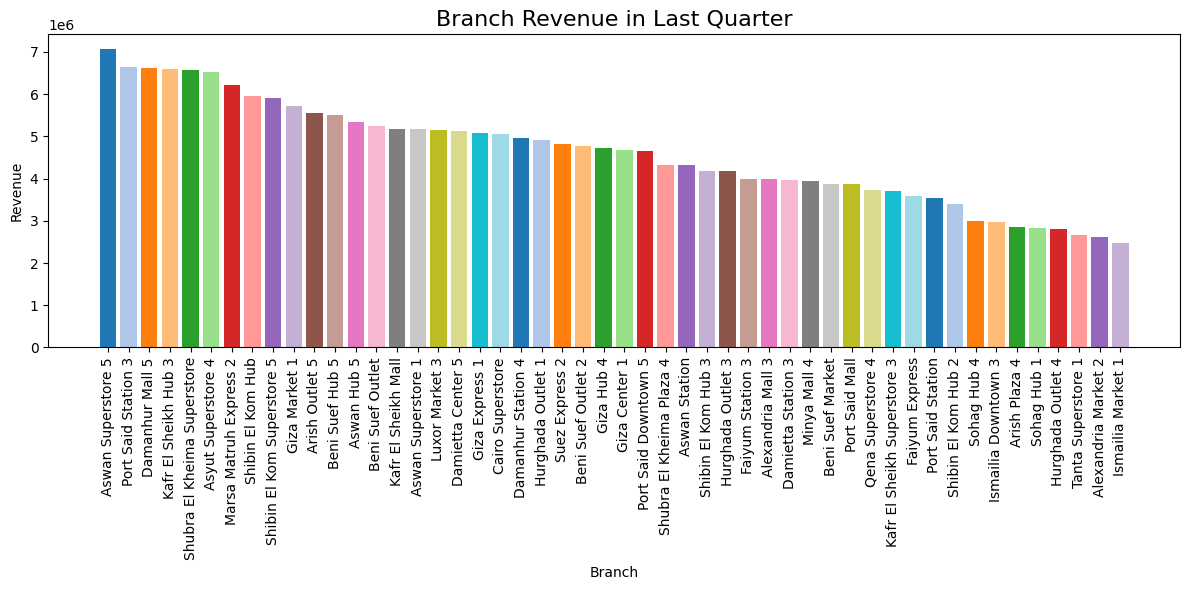

In [ ]:
colors = plt.cm.tab20.colors
plt.figure(figsize=(12,6))
plt.bar(df["Branch.BranchName"],df["Revenue"], color=colors[:len(df)])
plt.xticks(rotation=90)  
plt.title("Branch Revenue in Last Quarter", fontsize=16)
plt.xlabel("Branch")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

### 2️⃣ Branch Revenue — Last Quarter
Revenue analysis for the **last quarter** reveals noticeable variation across branches.  
High-performing branches can serve as benchmarks, while low-performing branches may require operational or promotional improvements.  
*Insights:* Optimize resources and marketing strategies based on branch performance.

In [ ]:
# 3️⃣ Daily Sales Trends
d= requests.get("http://127.0.0.1:5000/dailysales")
print(d.status_code)
print(d.text)

200
[{"Date":"Fri, 23 Sep 2022 00:00:00 GMT","Revenue":15996370.0},{"Date":"Thu, 02 Mar 2023 00:00:00 GMT","Revenue":14951674.0},{"Date":"Wed, 11 Jun 2025 00:00:00 GMT","Revenue":14772490.0},{"Date":"Sat, 21 Dec 2024 00:00:00 GMT","Revenue":14428402.0},{"Date":"Mon, 29 Sep 2025 00:00:00 GMT","Revenue":14357020.0},{"Date":"Sun, 30 Jul 2023 00:00:00 GMT","Revenue":14281896.0},{"Date":"Sat, 14 Sep 2024 00:00:00 GMT","Revenue":14154546.0},{"Date":"Wed, 09 Oct 2024 00:00:00 GMT","Revenue":13974742.0},{"Date":"Tue, 19 Mar 2024 00:00:00 GMT","Revenue":13954188.0},{"Date":"Fri, 13 Dec 2024 00:00:00 GMT","Revenue":13620420.0},{"Date":"Wed, 10 Aug 2022 00:00:00 GMT","Revenue":13426668.0},{"Date":"Wed, 03 May 2023 00:00:00 GMT","Revenue":13374932.0},{"Date":"Mon, 15 Jul 2024 00:00:00 GMT","Revenue":13306564.0},{"Date":"Thu, 10 Mar 2022 00:00:00 GMT","Revenue":13196728.0},{"Date":"Sat, 27 Jul 2024 00:00:00 GMT","Revenue":12958784.0},{"Date":"Tue, 20 Jun 2023 00:00:00 GMT","Revenue":12957448.0},{"D

In [8]:
daily=d.json()
df=pd.DataFrame(daily)

In [9]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=df["Date"],
    y=df["Revenue"],
    name="dailysales",
    mode="lines+markers",
    line=dict(color="blue",width=3)
))
fig.update_layout(
    title="DailySales",
    xaxis_title="DATE",
    yaxis_title="Revenue",
    hovermode="x unified",
    template="plotly_white",
    legend=dict(title="Cities",orientation="h",x=0.3,y=-0.2)

)

### 3️⃣ Daily Sales Trends
Daily sales visualization highlights fluctuations in purchasing activity.  
Peak sales days indicate higher footfall and promotional effectiveness.  
*Insights:* Use this to optimize staffing, inventory, and campaign timing.

In [ ]:
# 4️⃣ Branches Ranked by Revenue
b= requests.get("http://127.0.0.1:5000//branchrevenue")
print(b.status_code)
print(b.text)

200
[{"Branch.BranchName":"Kafr El Sheikh Superstore 3","Revenue":243718714.0},{"Branch.BranchName":"Aswan Superstore 1","Revenue":240339900.0},{"Branch.BranchName":"Faiyum Express","Revenue":239558622.0},{"Branch.BranchName":"Damietta Station 3","Revenue":238582392.0},{"Branch.BranchName":"Arish Outlet 5","Revenue":237187018.0},{"Branch.BranchName":"Aswan Station","Revenue":237104820.0},{"Branch.BranchName":"Giza Center 1","Revenue":235904610.0},{"Branch.BranchName":"Kafr El Sheikh Mall","Revenue":235011242.0},{"Branch.BranchName":"Beni Suef Market","Revenue":234176064.0},{"Branch.BranchName":"Shubra El Kheima Superstore","Revenue":233387692.0},{"Branch.BranchName":"Hurghada Outlet 4","Revenue":233093564.0},{"Branch.BranchName":"Sohag Hub 1","Revenue":232364026.0},{"Branch.BranchName":"Shibin El Kom Superstore 5","Revenue":231640482.0},{"Branch.BranchName":"Asyut Superstore 4","Revenue":230761938.0},{"Branch.BranchName":"Damanhur Mall 5","Revenue":230486778.0},{"Branch.BranchName":"Ka

In [10]:
branch=b.json()
df=pd.DataFrame(branch)

In [40]:
import plotly.express as px

fig = px.bar(
    df,
    x="Branch.BranchName",
    y="Revenue",
    text="Branch.BranchName",  
    title="Branches by revenue",
    template="plotly_white"
)

fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_title="Branch",
    yaxis_title="Revenue",
    showlegend=True
)

fig.show()


### 4️⃣ Branches Ranked by Revenue
Ranking branches by revenue shows a clear performance hierarchy.  
A few branches dominate total sales contribution, while others lag behind.  
*Insights:* Support decisions like resource allocation and performance evaluation.

In [ ]:
# 5️⃣ Ramadan vs Other Sales
rvso= requests.get("http://127.0.0.1:5000/ramadan_vs_other")
print(rvso.status_code)
print(rvso.text)

200
{"Other_Sales":11043437826.0,"Ramadan_Sales":226352304.0}



In [13]:
datavs=rvso.json()


In [49]:

data = {"Ramadan_Sales": 226352304.0, "Other_Sales": 11043437826.0}
names = list(data.keys())
values = list(data.values())

In [55]:



data = {
    "Type": ["Ramadan Sales", "Other Sales"],
    "Revenue": [226352304.0, 11043437826.0]
}

df = pd.DataFrame(data)


fig = px.pie(
    df,
    names="Type",
    values="Revenue",
    color="Type",
    color_discrete_map={'Ramadan Sales':'orange', 'Other Sales':'blue'},
    title="Ramadan vs Other Sales"
)


fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()


### 5️⃣ Ramadan vs Other Sales
Sales comparison between **Ramadan** and non-Ramadan periods shows a significant shift in customer behavior.  
During Ramadan, sales volume increases and demand for specific products rises.  
*Insights:* Plan seasonal inventory, promotions, and staffing accordingly.

In [ ]:
# 6️⃣ Top Product Performance
product = requests.get("http://127.0.0.1:5000/topproduct")
print(product.status_code)
print(product.text)

200
[{"Product.ProductName":"Jewelry Advanced 957","ProductRevenue":113941734.0},{"Product.ProductName":"Jewelry Smart 818","ProductRevenue":108410500.0},{"Product.ProductName":"Jewelry Premium 985","ProductRevenue":106855696.0},{"Product.ProductName":"Jewelry Pro 379","ProductRevenue":104386800.0},{"Product.ProductName":"Jewelry Plus 662","ProductRevenue":101452600.0},{"Product.ProductName":"Jewelry Advanced 964","ProductRevenue":98591160.0},{"Product.ProductName":"Jewelry Premium 773","ProductRevenue":97626440.0},{"Product.ProductName":"Jewelry Super 982","ProductRevenue":96252112.0},{"Product.ProductName":"Jewelry Modern 864","ProductRevenue":95577600.0},{"Product.ProductName":"Jewelry Advanced 211","ProductRevenue":95490200.0}]



In [12]:
prod=product.json()
df=pd.DataFrame(prod)

In [ ]:
fig=go.Figure
fig.add_trace(go.Scatter(
    x=df["Product.ProductName"],
    y=df["ProductRevenue"],
    mode="lines+markers",
    name="CAIRO"
))

fig.update_layout(
    title="TopProduct",
    xaxis_title="ProductName",
    yaxis_title="Revenue",
    hovermode="x unified",
    template="plotly_white",
    legend=dict(title="Cities",orientation="h",x=0.3,y=-0.2)

)



### 6️⃣ Top Product Performance
The top-selling product generated the highest revenue and sales volume.  
*Insights:* Ensure constant availability, bundle with other products, and run targeted promotions.

In [ ]:
# 7️⃣ Monthly Revenue Over Time
month = requests.get("http://127.0.0.1:5000/monthlysales")
print(month.status_code)
print(month.text)

200
[{"Month":"2022-01","Revenue":250052480.0},{"Month":"2022-02","Revenue":212385848.0},{"Month":"2022-03","Revenue":252939200.0},{"Month":"2022-04","Revenue":245917516.0},{"Month":"2022-05","Revenue":258323976.0},{"Month":"2022-06","Revenue":249346078.0},{"Month":"2022-07","Revenue":250486366.0},{"Month":"2022-08","Revenue":255745536.0},{"Month":"2022-09","Revenue":243839044.0},{"Month":"2022-10","Revenue":257242268.0},{"Month":"2022-11","Revenue":246813988.0},{"Month":"2022-12","Revenue":245977952.0},{"Month":"2023-01","Revenue":243004528.0},{"Month":"2023-02","Revenue":225234288.0},{"Month":"2023-03","Revenue":258018550.0},{"Month":"2023-04","Revenue":222556250.0},{"Month":"2023-05","Revenue":269162264.0},{"Month":"2023-06","Revenue":249943020.0},{"Month":"2023-07","Revenue":263390368.0},{"Month":"2023-08","Revenue":232085266.0},{"Month":"2023-09","Revenue":241778014.0},{"Month":"2023-10","Revenue":240083736.0},{"Month":"2023-11","Revenue":251147786.0},{"Month":"2023-12","Revenue":

In [6]:
m=month.json()
df=pd.DataFrame(m)
df["Month"] = pd.to_datetime(df["Month"]) 

In [12]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=df["Month"],
    y=df["Revenue"],
    mode="lines+markers",
    name="Monthly Revenue"
))

fig.update_layout(
    title="Monthly Revenue Over Time",
    xaxis_title="Month",
    yaxis_title="Revenue",
    hovermode="x unified",
    template="plotly_white"
)
fig.show()


### Monthly Revenue Over Time
The monthly revenue trend shows consistent growth over the first half of the year, indicating increasing sales performance.  
Peaks in specific months highlight potential seasonal demand or successful promotions.  

*Insights:* Use this trend to forecast future revenue, plan inventory, and design marketing campaigns for high-demand months.

## Conclusion
The business insights derived from this analysis highlight key revenue drivers, customer behavior patterns, branch performance, seasonal trends, and product popularity.  

Key takeaways include:
- Identifying top-performing customers and products to maximize loyalty and sales.  
- Monitoring branch performance to optimize resource allocation and operational efficiency.  
- Understanding daily, monthly, and seasonal trends to improve inventory planning and marketing strategies.  

Overall, these findings support data-driven decision-making to enhance business performance and customer satisfaction.